### Titanic Data Analysis

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns
import pandas as pd

In [7]:
# load the Titanic dataset
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Identify missing values
missing_values = titanic_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


###### Observation: The 'Age' and 'Cabin' columns have significant missing values.

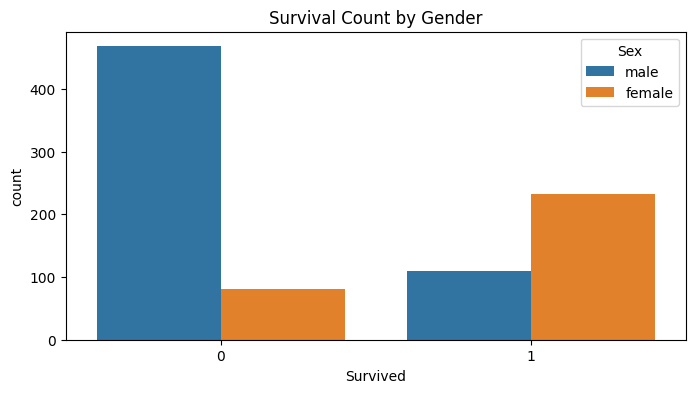

In [ ]:
plt.figure(figsize=(8, 4)) 
sns.countplot(x='Survived', data=titanic_data, hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

###### Observation: Female passengers had a higher survival rate compared to male passengers.